# Wine quality analysis
dataset imported from https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

%matplotlib inline
dfr = pd.read_csv('datasets/winequality-red.csv',sep=';')
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [66]:
dfw = pd.read_csv('datasets/winequality-white.csv',sep=';')
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


to know the number of tuples or records and number of attributes in a dataset use dataframe.shape

In [67]:
dfr.shape

(1599, 12)

In [68]:
dfw.shape

(4898, 12)

we use df,info() method to analyse and know the information about each column in a dataframe which gives us information such as **datatype , non-null , number of non null records**

In [69]:
dfr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**to know number of null records in each column in a dataset we can either use *df.info()* or alternately we can use *df.isnull().sum()*** 

In [70]:
dfr.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [71]:
dfw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [72]:
dfw.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

To know the number of duplicate records in a dataset we can use df.duplicated() which returns 0 for false(non duplicate records) and 1 for True(duplicate records). Hence we can sum up the number of duplicated records as
**sum(df.duplicated())** or **df.duplicated().sum()**

In [73]:
sum(dfr.duplicated())
# also can be written as
# dfr.duplicated().sum()

240

In [74]:
sum(dfw.duplicated())

937

To know the nuber of unique records in a specific column in a dataframe we use **df.columnname.nunique()**

In [75]:
dfr.quality.nunique()

6

In [76]:
dfw.quality.nunique()

7

To know the number of unique records in  all columns in a dataframe we use **df.nunique()**

In [77]:
dfr.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [78]:
dfw.nunique()

fixed acidity            68
volatile acidity        125
citric acid              87
residual sugar          310
chlorides               160
free sulfur dioxide     132
total sulfur dioxide    251
density                 890
pH                      103
sulphates                79
alcohol                 103
quality                   7
dtype: int64

### Appending Datasets
we can combine the red and white datasets to make our analysis more efficient. Use NumPy to create a new column that preserves color information, and then use pandas to combine the dataframes.

#### Create Color Columns
Create two arrays as long as the number of rows in the red and white dataframes that repeat the value “red” or “white.” NumPy offers really easy way to do this. Here’s the documentation for [NumPy’s repeat](https://docs.scipy.org/doc/numpy/reference/generated/numpy.repeat.html) function. Take a look and try it yourself.

In [79]:
# create color array for red dataframe
color_red = np.repeat('red',dfr.shape[0])

# create color array for white dataframe
color_white = np.repeat('white',dfw.shape[0])

Add arrays to the red and white dataframes. Do this by setting a new column called 'color' to the appropriate array. The cell below does this for the red dataframe.

In [80]:
dfr['color'] = color_red
dfr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [81]:
dfw['color']= color_white
dfw.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


Before we combine both the dataframes into a single dataframe we need to check whether the number of columns in both the data frames are same and the names of the columns also must be same. 
- here we can observe that total_suflur-dioxide is not same in both data sets hence change

In [82]:
dfr.rename(columns={'total_sulfur-dioxide':'total_sulfur_dioxide'}, inplace=True)

#### Combine DataFrames with Append
Check the documentation for [Pandas' append](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html) function and see if you can use this to figure out how to combine the dataframes. (Bonus: Why aren't we using the [merge](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html) method to combine the dataframes?) 

In [83]:
# append dataframes
wine_df = dfr.append(dfw)

# view dataframe to check for success
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [84]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [85]:
wine_df.shape

(6497, 13)

In [86]:
labels = ['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality','color']
wine_df.columns = labels
wine_df.head()


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


### Save Combined Dataset
Save your newly combined dataframe as `winequality_edited.csv`. Remember, set `index=False` to avoid saving with an unnamed column!

In [87]:
wine_df.to_csv('datasets/winequality.csv',index=False)

## Exploring with Visuals

we can plot various types of plots on the attributies to know the relationship between attributes. Some of the plots that can be plooted are histograms and scatter plots. These visuals are plotted on some attributes to better analyse them.

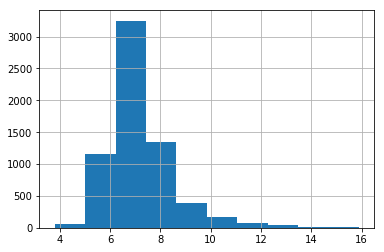

In [88]:
wine_df.fixed_acidity.hist();

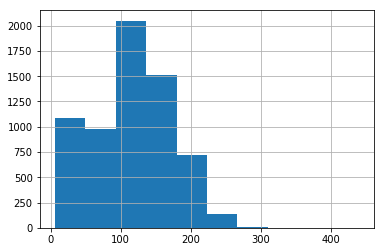

In [89]:
df.total_sulfur_dioxide.hist();

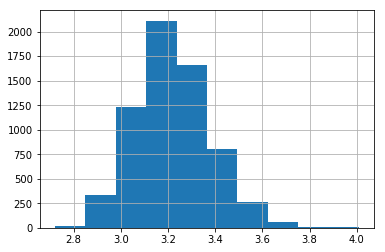

In [90]:
df.pH.hist();

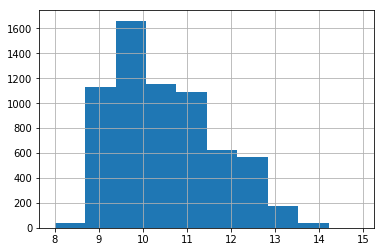

In [91]:
df.alcohol.hist();

### Scatterplots of Quality Against Various Features

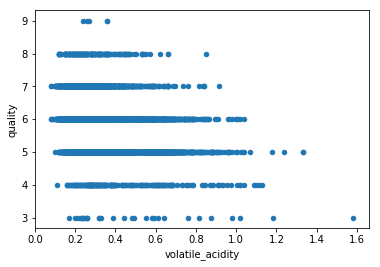

In [92]:
df.plot(x="volatile_acidity", y="quality", kind="scatter");

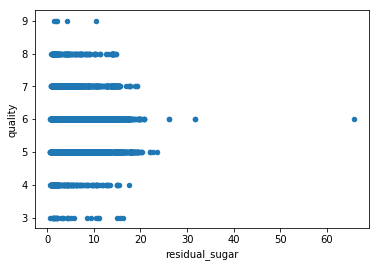

In [93]:
df.plot(x="residual_sugar", y="quality", kind="scatter");

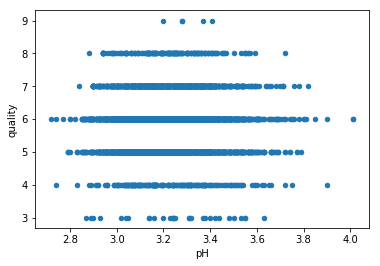

In [94]:
df.plot(x="pH", y="quality", kind="scatter");

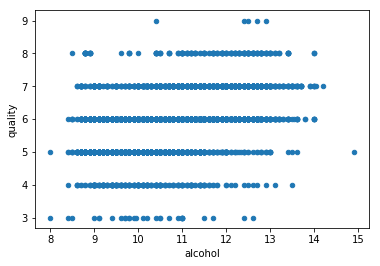

In [95]:
df.plot(x="alcohol", y="quality", kind="scatter");

### Using Pandas Groupby

we can get summary statistics of whole data by using df.describe() or df.mean()

In [96]:
df.mean()

fixed_acidity             7.215307
volatile_acidity          0.339666
citric_acid               0.318633
residual_sugar            5.443235
chlorides                 0.056034
free_sulfur_dioxide      30.525319
total_sulfur_dioxide    115.744574
density                   0.994697
pH                        3.218501
sulphates                 0.531268
alcohol                  10.491801
quality                   5.818378
dtype: float64

But if i want to find the mean for each quality rating? we can use pandas **groupby** function

In [97]:
df.groupby('quality').mean()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,7.853333,0.517000,0.281000,5.140000,0.077033,39.216667,122.033333,0.995744,3.257667,0.506333,10.215000
4,7.288889,0.457963,0.272315,4.153704,0.060056,20.636574,103.432870,0.994833,3.231620,0.505648,10.180093
5,7.326801,0.389614,0.307722,5.804116,0.064666,30.237371,120.839102,0.995849,3.212189,0.526403,9.837783
6,7.177257,0.313863,0.323583,5.549753,0.054157,31.165021,115.410790,0.994558,3.217726,0.532549,10.587553
7,7.128962,0.288800,0.334764,4.731696,0.045272,30.422150,108.498610,0.993126,3.228072,0.547025,11.386006
8,6.835233,0.291010,0.332539,5.382902,0.041124,34.533679,117.518135,0.992514,3.223212,0.512487,11.678756
9,7.420000,0.298000,0.386000,4.120000,0.027400,33.400000,116.000000,0.991460,3.308000,0.466000,12.180000


Hence we got the mean values of all colums for each quality rating.

We could even split the data set with multiple columns to groupby, by providing a list. 

In [98]:
df.groupby(['quality','color']).mean()

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red         8.360000          0.884500     0.171000        2.635000   
        white       7.600000          0.333250     0.336000        6.392500   
4       red         7.779245          0.693962     0.174151        2.694340   
        white       7.129448          0.381227     0.304233        4.628221   
5       red         8.167254          0.577041     0.243686        2.528855   
        white       6.933974          0.302011     0.337653        7.334969   
6       red         8.347179          0.497484     0.273824        2.477194   
        white       6.837671          0.260564     0.338025        6.441606   
7       red         8.872362          0.403920     0.375176        2.720603   
        white       6.734716          0.262767     0.325625        5.186477   
8       red         8.566667          0.423333     0.391111        2.577778   
        white       6.657143          0.277400     0.326514        5.671429   
9       white       7.420000          0.298000     0.386000        4.120000   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
quality color                                                                   
3       red     0.122500            11.000000             24.900000  0.997464   
        white   0.054300            53.325000            170.600000  0.994884   
4       red     0.090679            12.264151             36.245283  0.996542   
        white   0.050098            23.358896            125.279141  0.994277   
5       red     0.092736            16.983847             56.513950  0.997104   
        white   0.051546            36.432052            150.904598  0.995263   
6       red     0.084956            15.711599             40.869906  0.996615   
        white   0.045217            35.650591            137.047316  0.993961   
7       red     0.076588            14.045226             35.020101  0.996104   
        white   0.038191            34.125568            125.114773  0.992452   
8       red     0.068444            13.277778             33.444444  0.995212   
        white   0.038314            36.720000            126.165714  0.992236   
9       white   0.027400            33.400000            116.000000  0.991460   

                     pH  sulphates    alcohol  
quality color                                  
3       red    3.398000   0.570000   9.955000  
        white  3.187500   0.474500  10.345000  
4       red    3.381509   0.596415  10.265094  
        white  3.182883   0.476135  10.152454  
5       red    3.304949   0.620969   9.899706  
        white  3.168833   0.482203   9.808840  
6       red    3.318072   0.675329  10.629519  
        white  3.188599   0.491106  10.575372  
7       red    3.290754   0.741256  11.465913  
        white  3.213898   0.503102  11.367936  
8       red    3.267222   0.767778  12.094444  
        white  3.218686   0.486229  11.636000  
9       white  3.308000   0.466000  12.180000

- These are the means of all the other features grouped by quality and then colour.
- If we dont want quality or color to be made as index we can set **as_index** as **False**

In [99]:
df.groupby(['quality','color'],as_index = False).mean()

,quality,color,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,3,red,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
1,3,white,7.600000,0.333250,0.336000,6.392500,0.054300,53.325000,170.600000,0.994884,3.187500,0.474500,10.345000
2,4,red,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
3,4,white,7.129448,0.381227,0.304233,4.628221,0.050098,23.358896,125.279141,0.994277,3.182883,0.476135,10.152454
4,5,red,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
5,5,white,6.933974,0.302011,0.337653,7.334969,0.051546,36.432052,150.904598,0.995263,3.168833,0.482203,9.808840
6,6,red,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,6,white,6.837671,0.260564,0.338025,6.441606,0.045217,35.650591,137.047316,0.993961,3.188599,0.491106,10.575372
8,7,red,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
9,7,white,6.734716,0.262767,0.325625,5.186477,0.038191,34.125568,125.114773,0.992452,3.213898,0.503102,11.367936


If you are only interested in one of the columns you could index the groups like this.

In [100]:
df.groupby(['quality','color'],as_index = False)['pH'].mean()

,quality,color,pH
0,3,red,3.398000
1,3,white,3.187500
2,4,red,3.381509
3,4,white,3.182883
4,5,red,3.304949
5,5,white,3.168833
6,6,red,3.318072
7,6,white,3.188599
8,7,red,3.290754
9,7,white,3.213898


## Drawing Conclusions using Groupby

### Is a certain type of wine associated with higher quality?

In [101]:
# Find the mean quality of each wine type (red and white) with groupby
df.groupby('color')['quality'].mean()

color
red      5.636023
white    5.877909
Name: quality, dtype: float64

we can conclude that the white wine has higher mean quality compared to red wine

### What level of acidity (pH value) receives the highest average rating?

This question is more tricky because unlike color, which has clear categories you can group by (red and white) **pH is a quantitative variable** without clear categories. However, there is a simple fix to this. You can **create a categorical variable from a quantitative variable** by creating your own categories. **pandas' cut** function let's you "cut" data in groups. Using this, create a new column called acidity_levels with these categories:
Acidity Levels:

    High: Lowest 25% of pH values
    Moderately High: 25% - 50% of pH values
    Medium: 50% - 75% of pH values
    Low: 75% - max pH value

Here, the data is being split at the 25th, 50th, and 75th percentile. Remember, you can get these numbers with pandas' describe()! After you create these four categories, you'll be able to use groupby to get the mean quality rating for each acidity level.


In [102]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
df['pH'].describe()

count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64

In [103]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [ 2.72,3.11 ,3.21 ,3.32 ,4.01 ] # Fill in this list with five values you just found.

In [104]:
# Labels for the four acidity level groups
bin_names = ['high','moderately_high','medium','low'] # Name each acidity level category

In [105]:
# Creates acidity_levels column
df['acidity_levels'] = pd.cut(df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,moderately_high
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,moderately_high
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,low


In [106]:
# Find the mean quality of each acidity level with groupby
df.groupby('acidity_levels')['pH'].mean()

acidity_levels
high               3.029062
moderately_high    3.164833
medium             3.267010
low                3.433348
Name: pH, dtype: float64

We can conclude that mean quality rating is high for low acidity levels i.e, high pH value (greater than 3.32)

In [107]:
df.to_csv('datasets/winequality.csv',index=False)

## Drawing Conclusions using query

### Do wines with higher alcoholic content receive better ratings?

In [108]:
# get the median amount of alcohol content
df['alcohol'].median()

10.3

In [109]:
# select samples with alcohol content less than the median
low_alcohol = df.query('alcohol < 10.3')

# select samples with alcohol content greater than or equal to the median
high_alcohol = df.query('alcohol >= 10.3')

# ensure these queries included each sample exactly once
num_samples = df.shape[0]
num_samples == low_alcohol['quality'].count() + high_alcohol['quality'].count() # should be True

True

In [110]:
# get mean quality rating for the low alcohol and high alcohol groups
low_alcohol['quality'].mean() , high_alcohol['quality'].mean()

(5.475920679886686, 6.146084337349397)

Hence we can conclude that wines with higher alcoholic content generally recieve better ratings

### Do sweeter wines receive better ratings?

In [111]:
# get the median amount of residual sugar
df['residual_sugar'].median()

3.0

In [112]:
# select samples with residual sugar less than the median
low_sugar = df.query('residual_sugar < 3.0')

# select samples with residual sugar greater than or equal to the median
high_sugar = df.query(' residual_sugar >= 3.0')

# ensure these queries included each sample exactly once
num_samples == low_sugar['quality'].count() + high_sugar['quality'].count() # should be True

True

In [113]:
# get mean quality rating for the low sugar and high sugar groups
low_sugar.quality.mean(), high_sugar.quality.mean()

(5.808800743724822, 5.82782874617737)

Hence we can conclude that sweeter wines generally recieve higher ratings

## Plotting wine colour and quality

- We can create visualisations to display our findings regarding the assosciations between wine quality and different properties of wine.
- We used groupby to find the mean wine quality for each colour. we can use those results for these visualisations.

To do this we can add plot at the end of group by statement 

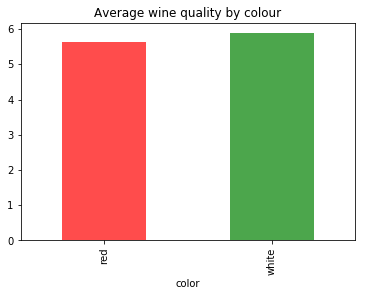

In [133]:
colors = ['red','green']
# white colour bar merges into background (white wine bar)
df.groupby('color')['quality'].mean().plot(kind='bar',title='Average wine quality by colour', color=colors,alpha = .7);

For our final visualisations, we should have appropriate labels for both the x and y axis. we also dont want our white bar disappearing into white background. At this point we cant get away with using only pandas. lets import matplotlib.pyplot and alias it as plt. Also lets import seaborn and alias it as sns. 

Even if we dont use seaborn directly, it adds additional formatting to our plots that make them more aesthetically pleasing than standard matplotlib.

Now that we have matplotlib we can set x and y axis labels like this.

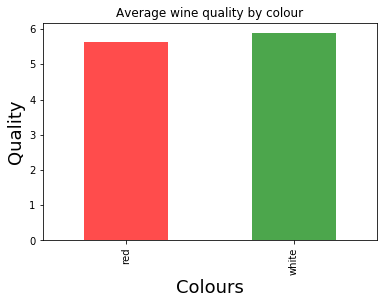

In [134]:
color_means = df.groupby('color')['quality'].mean()
color_means.plot(kind='bar',title='Average wine quality by colour', color=colors,alpha = .7);
plt.xlabel('Colours',fontsize=18)
plt.ylabel('Quality',fontsize=18);

Although this visual shows us that the white wine samples has slightly higher average quality ratings, it would be better to know more details where that's coming from. Lets put a more detailed bar chart. counts for each quality rating by colour. we can group by quality and colour to do this. 

In [128]:
counts = df.groupby(['quality','color']).count()
counts

fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
quality color                                                                 
3       red               10                10           10              10   
        white             20                20           20              20   
4       red               53                53           53              53   
        white            163               163          163             163   
5       red              681               681          681             681   
        white           1457              1457         1457            1457   
6       red              638               638          638             638   
        white           2198              2198         2198            2198   
7       red              199               199          199             199   
        white            880               880          880             880   
8       red               18                18           18              18   
        white            175               175          175             175   
9       white              5                 5            5               5   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density  \
quality color                                                                  
3       red           10                   10                    10       10   
        white         20                   20                    20       20   
4       red           53                   53                    53       53   
        white        163                  163                   163      163   
5       red          681                  681                   681      681   
        white       1457                 1457                  1457     1457   
6       red          638                  638                   638      638   
        white       2198                 2198                  2198     2198   
7       red          199                  199                   199      199   
        white        880                  880                   880      880   
8       red           18                   18                    18       18   
        white        175                  175                   175      175   
9       white          5                    5                     5        5   

                 pH  sulphates  alcohol  acidity_levels  
quality color                                            
3       red      10         10       10              10  
        white    20         20       20              20  
4       red      53         53       53              53  
        white   163        163      163             163  
5       red     681        681      681             681  
        white  1457       1457     1457            1457  
6       red     638        638      638             638  
        white  2198       2198     2198            2197  
7       red     199        199      199             199  
        white   880        880      880             880  
8       red      18         18       18              18  
        white   175        175      175             175  
9       white     5          5        5               5

all are same so lets pick an arbitrary one

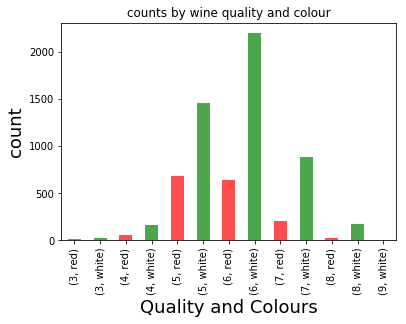

In [137]:
counts = df.groupby(['quality','color']).count()['pH']
counts.plot(kind='bar',title = 'counts by wine quality and colour',color= colors, alpha=0.7)
plt.xlabel('Quality and Colours',fontsize=18)
plt.ylabel('count',fontsize=18);

Theres clearly more white samples than red samples. So its hard to mark a fair compariso, we just count. To balance this out lets divide each count by total count for that colour to use proportions instead. That looks a lot better.

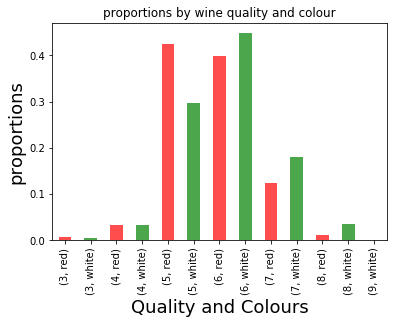

In [141]:
total = df.groupby('color').count()['pH']
proportions = counts/total
proportions.plot(kind='bar',title = 'proportions by wine quality and colour',color= colors, alpha=0.7)
plt.xlabel('Quality and Colours',fontsize=18)
plt.ylabel('proportions',fontsize=18);

We can see that for lower rating 3,4 and 5 red samples show higher proportions and for higher ratings 6,7,8 and 9 white samples have higher proportion. 

The x labels on x axis looks messy and it would be nice to have red and green bar for each rating next to each other. we're also missing a spot for red samples with quality rating of 9. Although that number is zero that spot should still be there. It makes more sense and visually good if we use matplotlib directly.

# Plotting with Matplotlib
Use Matplotlib to create bar charts that visualize the conclusions we made with groupby and query.

### 1: Do wines with higher alcoholic content receive better ratings?
Create a bar chart with one bar for low alcohol and one bar for high alcohol wine samples.

In [142]:
# Use query to select each group and get its mean quality
median = df['alcohol'].median()
low = df.query('alcohol < {}'.format(median))
high = df.query('alcohol >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

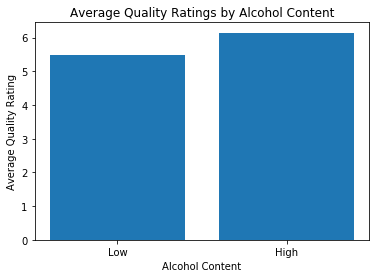

In [143]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### 2: Do sweeter wines receive higher ratings?
Create a bar chart with one bar for low residual sugar and one bar for high residual sugar wine samples.

In [144]:
# Use query to select each group and get its mean quality
median = df['residual_sugar'].median()
low = df.query('residual_sugar < {}'.format(median))
high = df.query('residual_sugar >= {}'.format(median))

mean_quality_low = low['quality'].mean()
mean_quality_high = high['quality'].mean()

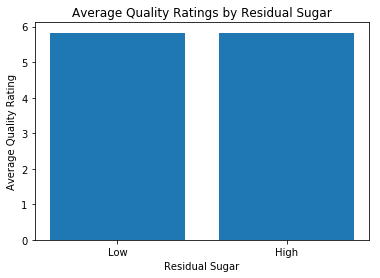

In [145]:
# Create a bar chart with proper labels
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Average Quality Rating');

### 3: What level of acidity receives the highest average rating?
Create a bar chart with a bar for each of the four acidity levels.

In [146]:
# Use groupby to get the mean quality for each acidity level
acidity_level_quality_means = df.groupby('acidity_levels').quality.mean()
acidity_level_quality_means

acidity_levels
high               5.783343
moderately_high    5.784540
medium             5.850832
low                5.859593
Name: quality, dtype: float64

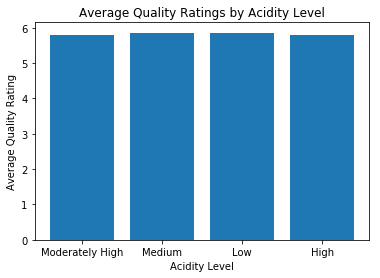

In [147]:
# Create a bar chart with proper labels
locations = [4, 1, 2, 3]  # reorder values above to go from low to high
heights = acidity_level_quality_means

# labels = ['Low', 'Medium', 'Moderately High', 'High']
labels = acidity_level_quality_means.index.str.replace('_', ' ').str.title() # alternative to commented out line above

plt.bar(locations, heights, tick_label=labels)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

# Plotting Wine Type and Quality with Matplotlib

### Create arrays for red bar heights white bar heights
Remember, there's a bar for each combination of color and quality rating. Each bar's height is based on the proportion of samples of that color with that quality rating.
1. Red bar proportions = counts for each quality rating / total # of red samples
2. White bar proportions = counts for each quality rating / total # of white samples

In [150]:
# get counts for each rating and color
color_counts = df.groupby(['color', 'quality']).count()['pH']
color_counts

color  quality
red    3            10
       4            53
       5           681
       6           638
       7           199
       8            18
white  3            20
       4           163
       5          1457
       6          2198
       7           880
       8           175
       9             5
Name: pH, dtype: int64

In [156]:
color_totals = df.groupby('color').count()['pH']
color_totals

color
red      1599
white    4898
Name: pH, dtype: int64

In [157]:
# get proportions by dividing red rating counts by total # of red samples
red_proportions = color_counts['red'] / color_totals['red']
# get proportions by dividing white rating counts by total # of white samples
white_proportions = color_counts['white'] / color_totals['white']
red_proportions,white_proportions

(quality
 3    0.006254
 4    0.033146
 5    0.425891
 6    0.398999
 7    0.124453
 8    0.011257
 Name: pH, dtype: float64, quality
 3    0.004083
 4    0.033279
 5    0.297468
 6    0.448755
 7    0.179665
 8    0.035729
 9    0.001021
 Name: pH, dtype: float64)

### Plot proportions on a bar chart
Set the x coordinate location for each rating group and and width of each bar.

In [158]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

ValueError: shape mismatch: objects cannot be broadcast to a single shape

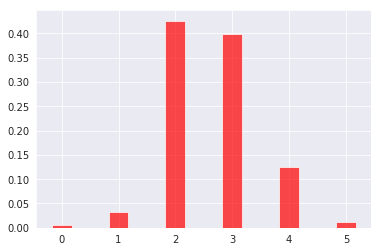

In [159]:
# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()

Oh, that didn't work because we're missing a red wine value for a the 9 rating. Even though this number is a 0, we need it for our plot. Run the last two cells after running the cell below.

In [160]:
red_proportions['9'] = 0
red_proportions

quality
3    0.006254
4    0.033146
5    0.425891
6    0.398999
7    0.124453
8    0.011257
9    0.000000
Name: pH, dtype: float64

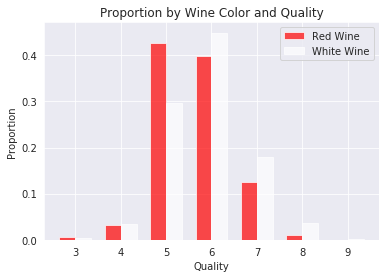

In [161]:
ind = np.arange(len(red_proportions))  # the x locations for the groups
width = 0.35       # the width of the bars

# plot bars
red_bars = plt.bar(ind, red_proportions, width, color='r', alpha=.7, label='Red Wine')
white_bars = plt.bar(ind + width, white_proportions, width, color='w', alpha=.7, label='White Wine')

# title and labels
plt.ylabel('Proportion')
plt.xlabel('Quality')
plt.title('Proportion by Wine Color and Quality')
locations = ind + width / 2  # xtick locations
labels = ['3', '4', '5', '6', '7', '8', '9']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend()